In [62]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

生成速度场

In [63]:
x = np.linspace(0, 200, 1000)
x.shape

(1000,)

In [64]:
a = 10  # 峰值大小
b = 100  # 峰值位置
c = 0.05 # 标准差，分布集中情况

In [65]:
y = a * math.e ** ((-(x - b) ** 2) / 2 * c ** 2)  # 速度的分布

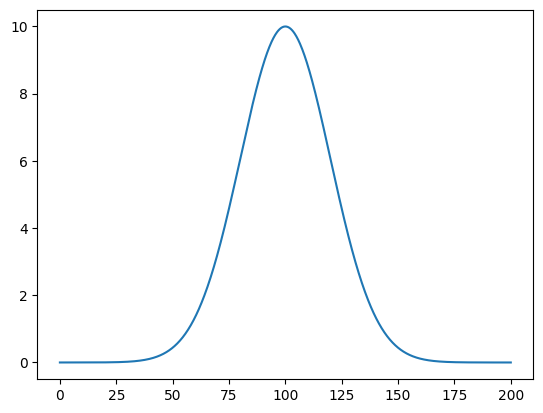

In [66]:
plt.plot(x, y)

In [67]:
def get_speed(x, a=255, b=100, c=0.05):
    v = a * math.e ** ((-(x - b) ** 2) / 2 * c ** 2)
    return v

In [68]:
velocity_space = np.zeros((700, 200))
for x in range(200):
    velocity_space[:, x] = get_speed(x)

In [69]:
velocity_space

array([[0.0009503 , 0.00121868, 0.00155896, ..., 0.00198927, 0.00155896,
        0.00121868],
       [0.0009503 , 0.00121868, 0.00155896, ..., 0.00198927, 0.00155896,
        0.00121868],
       [0.0009503 , 0.00121868, 0.00155896, ..., 0.00198927, 0.00155896,
        0.00121868],
       ...,
       [0.0009503 , 0.00121868, 0.00155896, ..., 0.00198927, 0.00155896,
        0.00121868],
       [0.0009503 , 0.00121868, 0.00155896, ..., 0.00198927, 0.00155896,
        0.00121868],
       [0.0009503 , 0.00121868, 0.00155896, ..., 0.00198927, 0.00155896,
        0.00121868]])

In [70]:
velocity_space.max()

255.0

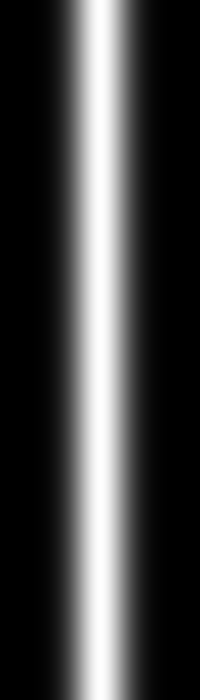

In [71]:
Image.fromarray(velocity_space).show()

生成粒子

In [72]:
import numpy as np

def get_ellipse_edge_points(x0=0, y0=0, a=3, b=2, theta=np.pi/4):
    # x0, y0: 椭圆中心坐标
    # a, b: 椭圆长轴、短轴
    # theta: 椭圆的倾斜角度（弧度制）
    
    # 椭圆的参数方程
    t = np.linspace(0, 2*np.pi, 200)
    x = x0 + a*np.cos(t)*np.cos(theta) - b*np.sin(t)*np.sin(theta)
    y = y0 + a*np.cos(t)*np.sin(theta) + b*np.sin(t)*np.cos(theta)
    
    # 返回坐标数组
    return np.array([x, y])


In [73]:
points = get_ellipse_edge_points()
print(points.shape)


(2, 200)


In [74]:
x = points[0, :]
y = points[1, :]

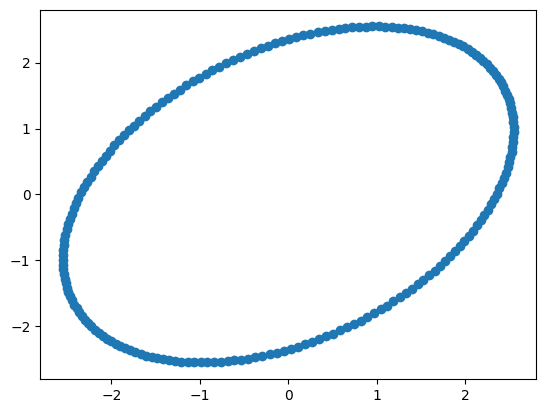

In [75]:
plt.scatter(x, y)

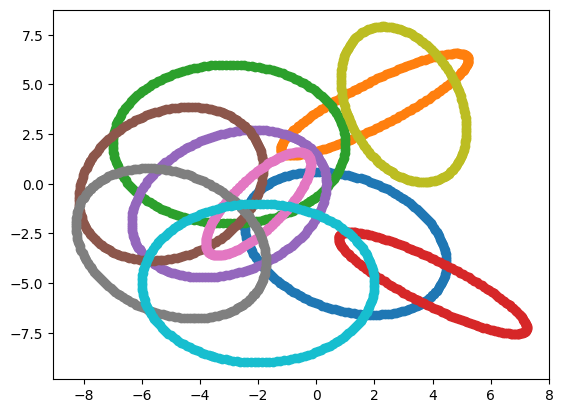

In [76]:
for _ in range(10):
    
    x0 = np.random.randint(-5, 5)
    y0 = np.random.randint(-5, 5)
    a = np.random.randint(1, 5)
    b = np.random.randint(1, 5)
    theta = np.random.random() * 2 * np.pi
    
    points = get_ellipse_edge_points(x0, y0, a, b, theta)
    
    x = points[0, :]
    y = points[1, :]
    plt.scatter(x, y)

plt.show()

使用3x3矩阵

In [77]:
base_image = np.ones((3, 3))
base_image[1, :] = 2
base_image[:, 1] = 2
base_image[1, 1] = 3
base_image

array([[1., 2., 1.],
       [2., 3., 2.],
       [1., 2., 1.]])

In [78]:
for i in range(base_image.shape[0]):
    for j in range(base_image.shape[1]):
        base_image[i, j] += np.random.random()

In [79]:
base_image

array([[1.70451935, 2.41656914, 1.1619048 ],
       [2.46115128, 3.29633809, 2.18818859],
       [1.07886438, 2.2682628 , 1.40125782]])

In [101]:
def set_particle(background, x, y):
    
    base_image = np.ones((3, 3))
    base_image[1, :] = 2
    base_image[:, 1] = 2
    base_image[1, 1] = 3
    for i in range(base_image.shape[0]):
        for j in range(base_image.shape[1]):
            base_image[i, j] += np.random.random()
    
    base_image = (base_image - base_image.min()) / (base_image.max() - base_image.min()) * 255
    
    for i in range(base_image.shape[0]):
        for j in range(base_image.shape[1]):
            if x - 1 + i < 0:
                continue
            if y - 1 + j < 0:
                continue
            try:
                background[x - 1 + i, y - 1 + j] = base_image[i, j]
            except IndexError:
                continue


    return background

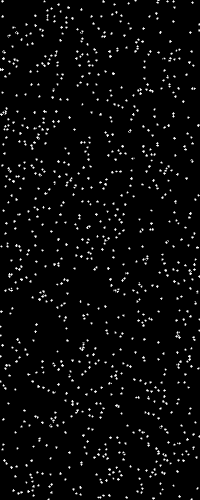

In [146]:
background = np.zeros((500, 200))

for _ in range(1000):
    
    x = np.random.randint(0, 500)
    y = np.random.randint(0, 200)
    background = set_particle(background, x, y)

Image.fromarray(background).show()